# Spaceship Titanic - Machine Learning Competition

### Group Members
       Muaawiyah Dadabhay
       Muhammed Raees Dindar
       Taahir Kolia
       Irfaan Mia

## Introduction

In this notebook, four machine-learning models are employed to predict whether passengers were transported to an alternate dimension, utilizing data frames sourced from Kaggle. The models utilized include _w_, _x_, _y_, and _z_.

Kaggle stands as a prominent data science platform renowned for hosting competitions and challenges in the field. It boasts a vibrant community comprising data scientists, statisticians, and machine learning experts who actively contribute their expertise to various projects.

For this particular endeavor, we leverage the Spaceship Titanic dataset available on Kaggle. The primary objective of this notebook is to ascertain which passengers were transported to an alternate dimension subsequent to a spaceship collision.

The methodology entails an initial data analysis, followed by feature engineering to facilitate modeling. Subsequently, the models are constructed and trained utilizing the provided dataset. Finally, comprehensive evaluations of all four models are conducted to ascertain the optimal choice for predicting passenger transportation to alternate dimensions.

## Importing of Python Libraries

In [3]:
#General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

from sklearn.impute import SimpleImputer

## 1. Gathering and Understanding Data

### Loading Data from a CSV

In [4]:
# Read test data
test_df = pd.read_csv("../data/test.csv")

# Read train data
train_df = pd.read_csv("../data/train.csv")

### Viewing of the Data

In [5]:
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [6]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


### Understanding the Data at Hand

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Observing the datatypes contained within the dataframes, Categorical data which is data that is not numerical in nature is identified. The categorical features are identified to be HomePlanet, CryoSleep, Destination, and VIP. The categorical features identified will further on in the investigation be transformed into numerical features.

### Determining Duplicate Values

In [9]:
print(f"The total duplicates in the test dataframe are: {test_df.duplicated().sum()}")
print(f"The total duplicates in the train dataframe are: {train_df.duplicated().sum()}")

The total duplicates in the test dataframe are: 0
The total duplicates in the train dataframe are: 0


### Determining Missing Values

In [10]:
print("Test Dataframes Missing Values")
test_df.isna().sum()

Test Dataframes Missing Values


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
print("Train Dataframes Missing Values")
train_df.isna().sum()

Train Dataframes Missing Values


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

It is observed that a both dataframes contain missing values. Some inference and data manipulation needs to be conducted to remove any missing values. This will be conducted further on in the investigation. For now, we will replace any missing values with NaN. Before we replace the missing values with NaN we combine both dataframes to make filling in values easier. The dataframes will be split back further on.

In [12]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
temp_combined_df = combined_df.copy()

In [13]:
# combined_df.replace('', np.NaN, inplace=True)
# combined_df.fillna(np.NaN, inplace=True)
combined_df.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


## 2. Data Analysis

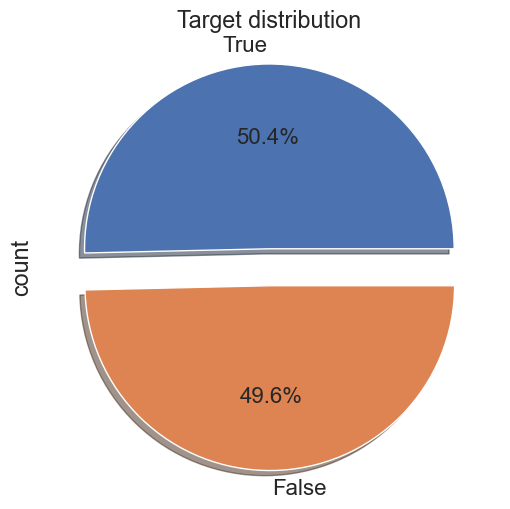

In [14]:
# Figure size
plt.figure(figsize=(6,6));

# Pie plot
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution");

The target feature is "Transported" which indicates whether or not a passenger was transported to another dimension. Approximately half of all passengers on board were transported.

### Categorical Feature Analysis

The categorical features will be analysed to determine how the target feature depends on the categorical features.

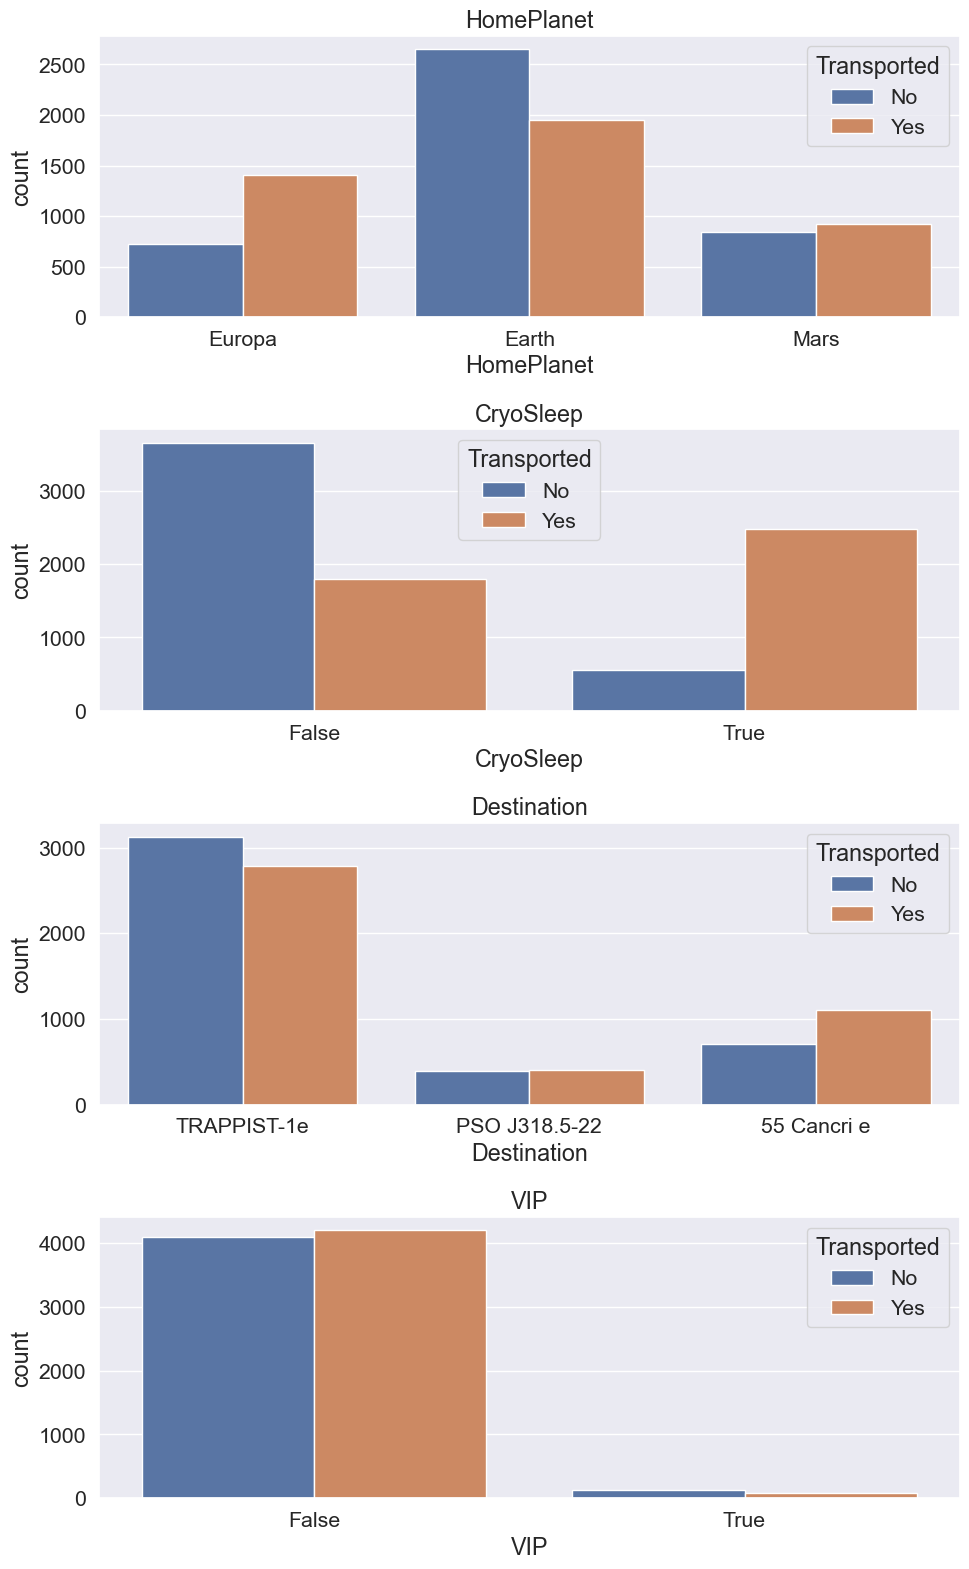

In [15]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Convert boolean values to strings ('Yes' and 'No')
temp_combined_df['Transported'] = combined_df['Transported'].map({True: 'Yes', False: 'No'})

# Plot categorical features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=temp_combined_df, x=var_name, ax=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

The relationship between categorical features and "Transported" are investigated. There  is no direct relationship between "Transported" and "HomePlanet", "Destination", and "VIP". "CryoSleep" appears to have a relationship with "Transported". People that are in CryoSleep have a higher liklihood of being transported compared to people not in CryoSleep [1].

[1]https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#EDA

### Numerical Feature Analysis


The numerical features will be analysed to determine how the target feature depends on the numerical features.

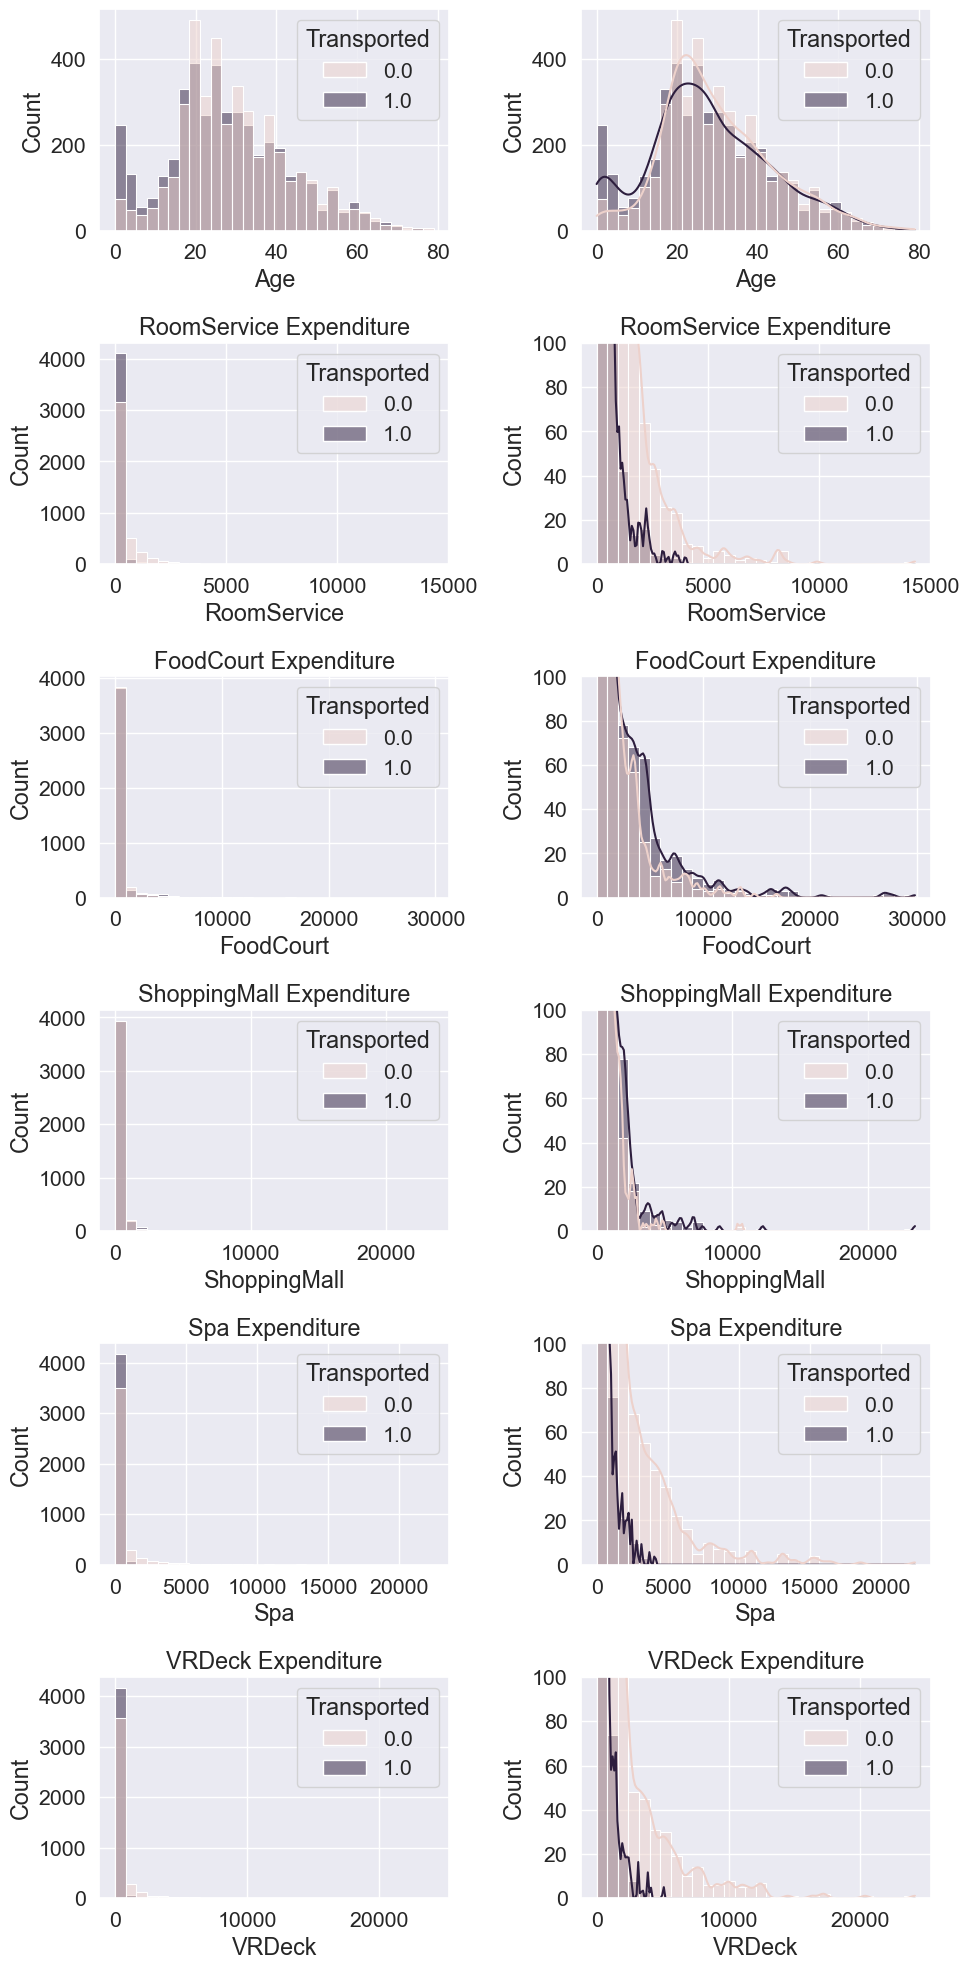

In [16]:
# Numerical features
num_feats=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot numerical features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(num_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    if(i!=0):
        ax.set_title(var_name + " Expenditure")
    
    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    if(i!=0):
        plt.ylim([0,100])
        ax.set_title(var_name + " Expenditure")
fig.tight_layout()  # Improves appearance a bit

plt.show()

Majority of passengers did not spend any money. People that spent less money were more likely to be transported. We can build on the relationship between CryoSleep and Transported as people in CryoSleep would not have spent any money. A simple way to verify this observastion is to form some sort of relationship. To make it easier to analyse, we group all individial expense features into a singular expense feature. 

In [17]:
expense_feature = ['RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']
combined_df['TotalExpenditure'] = combined_df.loc[:,expense_feature].sum(axis=1)

temp_combined_df['TotalExpenditure'] = temp_combined_df.loc[:,expense_feature].sum(axis=1)
combined_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0


In [18]:
# Convert 'TotalExpenditure' to a categorical variable indicating spent money or did not
temp_combined_df['TotalExpenditure'] = temp_combined_df['TotalExpenditure'].apply(lambda x: 'Spent Money' if x > 0 else 'Did Not Spend')

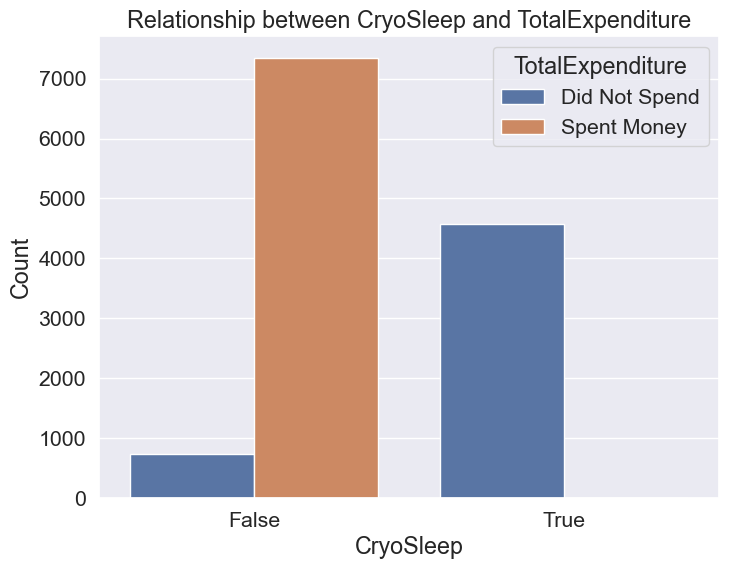

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='TotalExpenditure', data=temp_combined_df)
plt.title('Relationship between CryoSleep and TotalExpenditure')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

In [20]:
combined_df.groupby('HomePlanet')['VIP'].mean()

HomePlanet
Earth          0.0
Europa    0.057843
Mars      0.034312
Name: VIP, dtype: object

In [21]:
combined_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: object

In [22]:
combined_df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e          0.61
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: object

In [23]:
combined_df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: object

#### Age Analysis 



<Axes: >

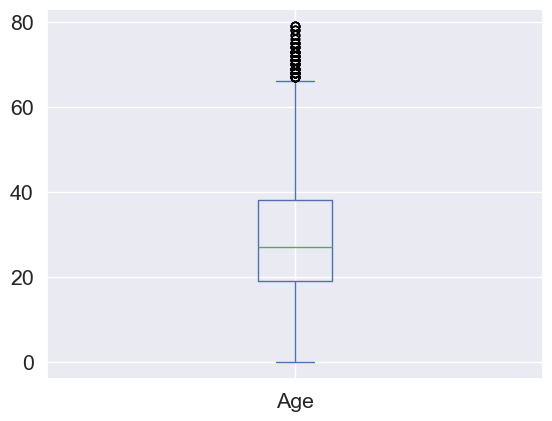

In [24]:
combined_df["Age"].plot(kind="box")

In [25]:
combined_df["Age"].describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

From the given data, it is seen that the range of the age of passengers is 79 years. This wide range of values in its current numerical form does not provide much meaningful information. However, this can be changed by binning the data into age groups, allowing for trends amongst age groups to be identified  more easily. Additionally, having an age group feature will greatly reduce the complexity of models

## 3. Feature Engineering


3. Fill in missing data
    - using mean for numeric
    - using mode for categorical

As observed from the plot above, people that are in "CryoSleep" do not have any expenditure. This fact can be utilised to fill in some missing values for the different expenditure features 

In [26]:
# Function to set expense features to 0 if CryoSleep and TotalExpenditure are both 0
def adjust_expenses(row):
    if row['CryoSleep'] == True:
        row[expense_feature] = 0
    return row

# Apply the function to the DataFrame
combined_df = combined_df.apply(adjust_expenses, axis=1)

The passengers' ID's and the Cabin location contain multiple forms of information that can be extracted into additional features. The cabin data is listed in the following format: _deck/num/side_. Therefore, we can split the cabin feature into three seperate features. Additionally, PassengerID is listed in the format gggg_pp, where _gggg_ represents the group number and _pp_ represents a passenger's number within a group. The PassengerID is extracted to form an additional feature

In [27]:
combined_df['Group'] = combined_df['PassengerId'].astype(str).str[:4]

counts = combined_df['Group'].value_counts()
combined_df['Group'] = combined_df['Group'].map(counts)

combined_df[['Deck', 'Number', 'Side']] = combined_df['Cabin'].str.split('/', expand=True)


combined_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure,Group,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,F,1,S


In [28]:
combined_df.loc[:,'VIP'] = combined_df.apply(lambda x: False if x.HomePlanet == "Earth" and pd.isna(x.VIP) else x, axis = 1)
combined_df.loc[:,'HomePlanet'] = combined_df.apply(lambda x: "Earth" if x.VIP == False and pd.isna(x.HomePlanet) else x, axis = 1)


In [29]:
'''
count_missing_vip_earth = 0

# Iterate through rows
for index, row in combined_df.iterrows():
    # Check if HomePlanet is 'Earth' and VIP is missing
    if row['CryoSleep'] == 'True' and pd.isna(row['RoomService']) and pd.isna(row['FoodCourt']) and pd.isna(row['ShoppingMall']) and pd.isna(row['Spa']) and pd.isna(row['VRDeck']):
        count_missing_vip_earth += 1

# Print the count
print(":", count_missing_vip_earth)
'''

'\ncount_missing_vip_earth = 0\n\n# Iterate through rows\nfor index, row in combined_df.iterrows():\n    # Check if HomePlanet is \'Earth\' and VIP is missing\n    if row[\'CryoSleep\'] == \'True\' and pd.isna(row[\'RoomService\']) and pd.isna(row[\'FoodCourt\']) and pd.isna(row[\'ShoppingMall\']) and pd.isna(row[\'Spa\']) and pd.isna(row[\'VRDeck\']):\n        count_missing_vip_earth += 1\n\n# Print the count\nprint(":", count_missing_vip_earth)\n'

#### Adjusting Ages


In [30]:
combined_df['Age_group']=np.nan
combined_df.loc[combined_df['Age']<=12,'Age_group']='1'
combined_df.loc[(combined_df['Age']>12) & (combined_df['Age']<18),'Age_group']='2'
combined_df.loc[(combined_df['Age']>=18) & (combined_df['Age']<=25),'Age_group']='3'
combined_df.loc[(combined_df['Age']>25) & (combined_df['Age']<=30),'Age_group']='4'
combined_df.loc[(combined_df['Age']>30) & (combined_df['Age']<=50),'Age_group']='5'
combined_df.loc[combined_df['Age']>50,'Age_group']='6'

In [31]:
combined_df.groupby('Age_group')['Transported'].mean()

Age_group
1    0.699752
2    0.553451
3    0.458103
4    0.496272
5    0.479432
6    0.484396
Name: Transported, dtype: object

In [32]:
combined_df.groupby('Age_group')['TotalExpenditure'].mean().fillna(0)

Age_group
1       0.000000
2     864.158085
3    1109.285911
4    1939.196378
5    1946.321492
6    1941.712022
Name: TotalExpenditure, dtype: float64

### Filling in missing data

In [33]:
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group"]
transported=['Transported']
combined_df = combined_df[num_cols+cat_cols+transported].copy()

In [34]:
# Print the count of passengers with missing data
print("Number of passengers with at least one missing column:", combined_df.isna().sum().sum())


Number of passengers with at least one missing column: 6754


Due to there being 4277 passengers with atleast one column of missing data, deleting entire rows or entire feature columns will saturate the available data. Therefore, this is not an ideal approach to dealing with missing data. To counter this issue, missing numerical data can filled in using the mean value of the respective feature. Similarly, missing categorical features can be filled with the mnost frequent value.    

In [35]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [36]:
combined_df[num_cols] = pd.DataFrame(num_imp.fit_transform(combined_df[num_cols]),columns=num_cols)
combined_df[cat_cols] = pd.DataFrame(cat_imp.fit_transform(combined_df[cat_cols]),columns=cat_cols)